In [ ]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv')
pd.set_option('display.max_columns', None)


In [5]:
# ------ Basic Info & Stats------
print(df.head())

   Unnamed: 0       id                                            title  \
0      831307   538416                            Vous seule que j'aime   
1       94983   126031                             A Woman Called Golda   
2     1139458  1041711                                       Satellites   
3      651881  1450343                            Viviendo Desconectado   
4      296437   652634  Venezuela: Wie man einen Staat zugrunde richtet   

   vote_average  vote_count    status release_date  revenue  runtime  adult  \
0           0.0           0  Released   1939-06-29        0       95  False   
1           8.3           7  Released   1982-04-26        0      240  False   
2           0.0           0  Released   2011-01-01        0        7  False   
3           0.0           0  Released          NaN        0        0  False   
4           8.0           1  Released   2019-11-11        0        0  False   

   budget     imdb_id original_language  \
0       0   tt0158349          

In [6]:
print(df.columns)
df.info()

Index(['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'tagline', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   id                    100000 non-null  int64  
 2   title                 99999 non-null   object 
 3   vote_average          100000 non-null  float64
 4   vote_count            100000 non-null  int64  
 5   status                100000 non-null  object 
 6   release_date          80097 non-null   object 
 7   revenue               100000 non-null  int64  
 8   runt

company              
Evil Angel                          (Evil Angel,)
BBC                                        (BBC,)
Metro-Goldwyn-Mayer        (Metro-Goldwyn-Mayer,)
ONF | NFB                            (ONF | NFB,)
Toei Company                      (Toei Company,)
Universal Pictures          (Universal Pictures,)
Columbia Pictures            (Columbia Pictures,)
Warner Bros. Pictures    (Warner Bros. Pictures,)
Paramount                            (Paramount,)
Nikkatsu Corporation      (Nikkatsu Corporation,)
 ARTE                                    ( ARTE,)
Private                                (Private,)
New Sensations                  (New Sensations,)
Digital Sin                        (Digital Sin,)
Naughty America                (Naughty America,)
dtype: object


/var/folders/nt/gd8mq25j1cd29qmwnym_mbjc0000gn/T/ipykernel_4759/1189132072.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


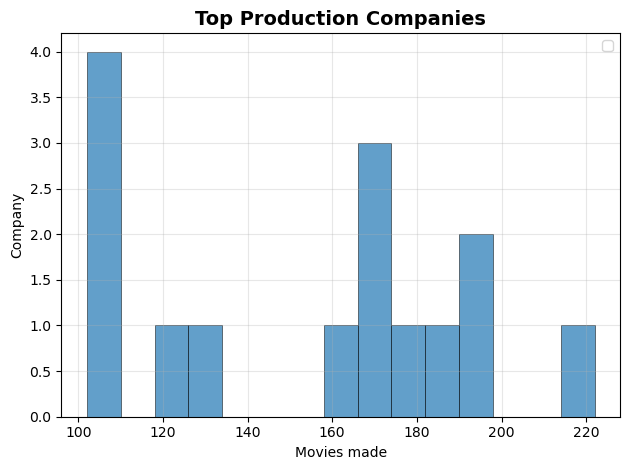

In [29]:
# ------ Histograms ------


# companies_flat = np.array([company for company in df["production_companies"]])
companies_flat: pd.Series = df['production_companies'].str.split(',').explode().dropna().reset_index(drop=True)
company_counts = companies_flat.to_frame(name='company').value_counts().sort_values(ascending=False).head(n=15)
print(company_counts.index.to_series())

# Basic histogram
n, bins, patches = plt.hist(company_counts, bins=len(company_counts), alpha=0.7,
                            edgecolor='black', linewidth=0.5)

# # Add mean line
# mean_val = np.mean(company_counts)
# plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
#             label=f'Mean: {mean_val:.1f}')

# # Add median line
# median_val = np.median(data)
# plt.axvline(median_val, color='green', linestyle='--', linewidth=2,
#             label=f'Median: {median_val:.1f}')

plt.title("Top Production Companies", fontsize=14, fontweight='bold')
plt.xlabel('Movies made')
plt.ylabel('Company')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
